In [4]:
import pickle
import pandas as pd
import numpy as np
from psm_causal_effects import psm_causal_effects
from extract_remove_nans import extract_remove_nans

# read data
with open('data.dat','rb') as f:
    data, subjects = pickle.load(f)
f.close()

n_boot = 100
scorefunction = 'replacement'
output = 'difference'
var_threshold = 0.5

ind_set = range(len(data))

es_m2s_mean = np.zeros([n_boot,4])
es_s2m_mean = np.zeros([n_boot,4])
es_s2m_um_mean = np.zeros([n_boot, 1])
es_m2s_um_mean = np.zeros([n_boot, 1])
    

for k in range(n_boot):
    
    print (k),
    
    inds = np.random.choice(ind_set, size=len(data), replace=True)
    #inds = np.arange(0,len(data))

    es_s2m = np.zeros([len(data),4])
    es_m2s = np.zeros([len(data),4])
    es_s2m_um = np.zeros([len(data), 1])
    es_m2s_um = np.zeros([len(data), 1])
    
    for (c,i) in enumerate(inds):
        
        if np.nanstd(data[i]['mood'])<var_threshold or np.nanstd(data[i]['quality'])<var_threshold:
            print('skipping subject '+str(i)+' due to low variance in mood or sleep quality.')
            es_m2s_um[c] = np.nan
            es_m2s[c,:] = np.nan
            es_s2m_um[c] = np.nan
            es_s2m[c,:] = np.nan
            continue
       
        # mood on sleep - lag 0 - unmatched
        treatment = 'mood_prev'
        outcome = 'quality'
        data_s = extract_remove_nans(data[i], [treatment]+[outcome])
        es_m2s_um[c] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=[], scorefun='unmatched', output=output)
        
        # mood on sleep - lag 0
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,0] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # mood on sleep - lag 1
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,1] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

        # mood on sleep - lag 2
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev','mood_prev3','quality_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,2] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

        # mood on sleep - lag 3
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev','mood_prev3','quality_prev2','mood_prev4','quality_prev3']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,3] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

        ################ sleep on mood
        
        # sleep on mood - lag 0 - unmatched
        treatment = 'quality'
        outcome = 'mood'
        data_s = extract_remove_nans(data[i], [treatment]+[outcome])
        es_s2m_um[c] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=[], scorefun='unmatched', output=output)
        
        # sleep on mood - lag 0
        confound = ['dow', 'mean_temp_prev', 'clear_prev', 'act_prev','daytype','stress_prev','energy_prev','focus_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,0] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # sleep on mood - lag 1
        confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,1] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # sleep on mood - lag 2
        confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev','mood_prev2','quality_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,2] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # sleep on mood - lag 3
        confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev','mood_prev2','quality_prev2','mood_prev3','quality_prev3']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,3] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
    es_m2s_mean[k,:] = np.nanmean(es_m2s, axis=0)
    es_s2m_mean[k,:] = np.nanmean(es_s2m, axis=0)
    es_m2s_um_mean[k] = np.nanmean(es_m2s_um, axis=0)
    es_s2m_um_mean[k] = np.nanmean(es_s2m_um, axis=0)
    


0 skipping subject 148 due to low variance in mood or sleep quality.
skipping subject 101 due to low variance in mood or sleep quality.
skipping subject 120 due to low variance in mood or sleep quality.
skipping subject 192 due to low variance in mood or sleep quality.
skipping subject 59 due to low variance in mood or sleep quality.
skipping subject 139 due to low variance in mood or sleep quality.
skipping subject 162 due to low variance in mood or sleep quality.
skipping subject 125 due to low variance in mood or sleep quality.
skipping subject 30 due to low variance in mood or sleep quality.
skipping subject 120 due to low variance in mood or sleep quality.
skipping subject 161 due to low variance in mood or sleep quality.
skipping subject 133 due to low variance in mood or sleep quality.
skipping subject 148 due to low variance in mood or sleep quality.
1 skipping subject 101 due to low variance in mood or sleep quality.
skipping subject 139 due to low variance in mood or sleep qu

## Group Difference

In [8]:
## t-tests
from scipy.stats import ttest_ind
t,p = ttest_ind(es_m2s_um_mean, es_s2m_um_mean, equal_var=False, axis=0)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,0], es_s2m_mean[:,0], equal_var=False)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,1], es_s2m_mean[:,1], equal_var=False)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,2], es_s2m_mean[:,2], equal_var=False)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,3], es_s2m_mean[:,3], equal_var=False)
print('T,P = ',t,p)

('T,P = ', array([-74.08376909]), array([  2.60879456e-146]))
('T,P = ', -37.169243403214161, 1.2308617459659571e-90)
('T,P = ', -41.250846902989828, 7.8231760057988908e-98)
('T,P = ', -35.360502676305551, 3.0039748335722448e-85)
('T,P = ', -42.771931662771692, 1.0106200121246588e-101)


(100, 1)

In [6]:
# compute standard deviations
es_m2s_um_std = np.std(es_m2s_um_mean, axis=0)
print(es_m2s_um_std)
es_s2m_um_std = np.std(es_s2m_um_mean, axis=0)
print(es_s2m_um_std)

es_m2s_std =np.std(es_m2s_mean, axis=0)
print(es_m2s_std)
es_s2m_std = np.std(es_s2m_mean, axis=0)
print(es_s2m_std)


[ 0.03624132]
[ 0.03989878]
[ 0.0572688   0.07264304  0.08660327  0.08120915]
[ 0.05686266  0.06613784  0.07671824  0.10331663]


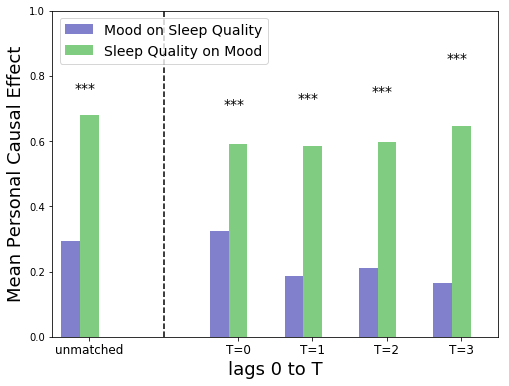

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
yerrs = np.array([[np.mean(es_m2s_um_mean)-np.percentile(es_m2s_um_mean,2.5),np.mean(es_m2s_mean[:,0])-np.percentile(es_m2s_mean[:,0],2.5),\
    np.mean(es_m2s_mean[:,1])-np.percentile(es_m2s_mean[:,1],2.5),np.mean(es_m2s_mean[:,2])-np.percentile(es_m2s_mean[:,2],2.5),\
    np.mean(es_m2s_mean[:,3])-np.percentile(es_m2s_mean[:,3],2.5)],\
    [np.percentile(es_m2s_um_mean,97.5)-np.mean(es_m2s_um_mean),np.percentile(es_m2s_mean[:,0],97.5)-np.mean(es_m2s_mean[:,0]),\
    np.percentile(es_m2s_mean[:,1],97.5)-np.mean(es_m2s_mean[:,1]),np.percentile(es_m2s_mean[:,2],97.5)-np.mean(es_m2s_mean[:,2]),\
    np.percentile(es_m2s_mean[:,3],97.5)-np.mean(es_m2s_mean[:,3])]])
plt.bar([-.25,1.75,2.75,3.75,4.75],np.concatenate([np.array([np.mean(es_m2s_um_mean)]),np.mean(es_m2s_mean,axis=0)],axis=0).reshape([5,1]),yerr=yerrs,\
    ecolor=(0,0,0),width=.25,color=(.5,.5,.8))
yerrs = np.array([[np.mean(es_s2m_um_mean)-np.percentile(es_s2m_um_mean,2.5),np.mean(es_s2m_mean[:,0])-np.percentile(es_s2m_mean[:,0],2.5),\
    np.mean(es_s2m_mean[:,1])-np.percentile(es_s2m_mean[:,1],2.5),np.mean(es_s2m_mean[:,2])-np.percentile(es_s2m_mean[:,2],2.5),\
    np.mean(es_s2m_mean[:,3])-np.percentile(es_s2m_mean[:,3],2.5)],\
    [np.percentile(es_s2m_um_mean,97.5)-np.mean(es_s2m_um_mean),np.percentile(es_s2m_mean[:,0],97.5)-np.mean(es_s2m_mean[:,0]),\
    np.percentile(es_s2m_mean[:,1],97.5)-np.mean(es_s2m_mean[:,1]),np.percentile(es_s2m_mean[:,2],97.5)-np.mean(es_s2m_mean[:,2]),\
    np.percentile(es_s2m_mean[:,3],97.5)-np.mean(es_s2m_mean[:,3])]])
plt.bar([0,2,3,4,5],np.concatenate([np.array([np.mean(es_s2m_um_mean)]),np.mean(es_s2m_mean,axis=0)],axis=0).reshape([5,1]),yerr=yerrs,\
    ecolor=(0,0,0),width=.25,color=(.5,.8,.5))
plt.text(-.2, .75, '***', fontsize=14)
plt.text(1.8, .70, '***', fontsize=14)
plt.text(2.8, .72, '***', fontsize=14)
plt.text(3.8, .74, '***', fontsize=14)
plt.text(4.8, .84, '***', fontsize=14)
a = plt.ylim([0,1])
plt.xlim([-.5,5.5])
plt.xticks([0,2,3,4,5],['unmatched', 'T=0','T=1','T=2','T=3'],rotation=0, fontsize=12);
plt.ylabel('Mean Personal Causal Effect',fontsize=18)
plt.xlabel('lags 0 to T',fontsize=18)
plt.legend(['Mood on Sleep Quality','Sleep Quality on Mood'],loc='upper right',bbox_to_anchor=(.5, 1), fontsize=14);
plt.plot([1,1],[a[0],a[1]],'--',color=(0,0,0))

('P = ', array([  2.10683159e-142]))
('P = ', 1.4263190673236971e-84)
('P = ', 5.7629727269034417e-98)
('P = ', 1.6294219563591843e-81)
('P = ', 9.614170509067606e-84)


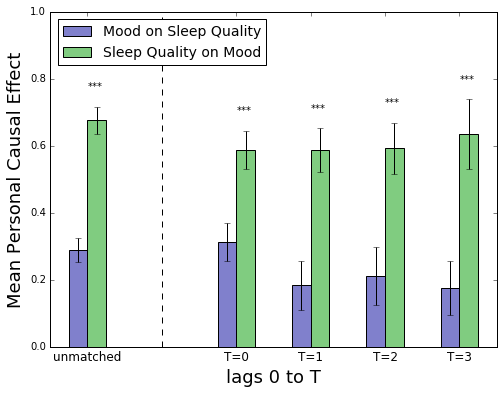

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind

plt.figure(figsize=(8,6))

# unmatched
plt.bar(-.25, np.mean(es_m2s_um_mean), yerr = np.std(es_m2s_um_mean),width=.25,ecolor=(0,0,0),color=(.5,.5,.8))
plt.bar(0, np.mean(es_s2m_um_mean), yerr = np.std(es_s2m_um_mean),width=.25,ecolor=(0,0,0),color=(.5,.8,.5))
t,p = ttest_ind(es_m2s_um_mean, es_s2m_um_mean, equal_var=False)
print('P = ',p)
if p<0.001:
    plt.text(0, np.mean(es_s2m_um_mean)+es_s2m_um_std+0.05, '***', fontsize=10)
#     elif p<0.01:
#         plt.text(2+i, np.mean(es_s2m_mean[:,i])+es_s2m_std[i]+0.05, '**', fontsize=10)
#     elif p<0.05:
#         plt.text(2+i, np.mean(es_s2m_mean[:,i])+es_s2m_std[i]+0.05, '*', fontsize=10)
# matched
for i in range(4):
    plt.bar(1.75+i, np.mean(es_m2s_mean[:, i]), yerr = np.std(es_m2s_mean[:, i]), width=.25, ecolor=(0,0,0),color=(.5,.5,.8))
    plt.bar(2+i, np.mean(es_s2m_mean[:, i]), yerr = np.std(es_s2m_mean[:, i]), width=.25,ecolor=(0,0,0),color=(.5,.8,.5))
    t,p = ttest_ind(es_m2s_mean[:,i], es_s2m_mean[:,i], equal_var=False)
    print('P = ',p)
    if p<0.001:
        plt.text(2+i, np.mean(es_s2m_mean[:,i])+es_s2m_std[i]+0.05, '***', fontsize=10)
    elif p<0.01:
        plt.text(2+i, np.mean(es_s2m_mean[:,i])+es_s2m_std[i]+0.05, '**', fontsize=10)
    elif p<0.05:
        plt.text(2+i, np.mean(es_s2m_mean[:,i])+es_s2m_std[i]+0.05, '*', fontsize=10)

axes = plt.gca()
axes.set_xlim([-.5,5.5])
axes.set_ylim([0,1])      

plt.xticks([0,2,3,4,5],['unmatched', 'T=0','T=1','T=2','T=3'],rotation=0, fontsize=12);
plt.ylabel('Mean Personal Causal Effect',fontsize=18)
plt.xlabel('lags 0 to T',fontsize=18)
plt.legend(['Mood on Sleep Quality','Sleep Quality on Mood'],loc='upper right',bbox_to_anchor=(.5, 1), fontsize=14);
plt.plot([1,1],plt.ylim,'--',color=(0,0,0))